In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing the Libraries.
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
#import keras.backend as K
import tensorflow.keras.backend as K
import tensorflow.compat.v1 as tf
from os import listdir
from os.path import isfile, join
import numpy as np
import sys
import os
import shutil
import pandas as pd
from PIL import Image
import cv2
import keras
import glob
from PIL import Image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.models import load_model
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from PIL import ImageFile

tf.enable_eager_execution()

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Data Augmentation.
DataGenerator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rescale=1./255)

In [ ]:
TestGenerator = ImageDataGenerator(rescale=1./255)

In [ ]:
Grey_TrainingData = DataGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Train/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 12733 images belonging to 60 classes.


In [ ]:
Grey_ValidData = TestGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Valid/', target_size=(224,224), batch_size=8, color_mode='grayscale')

Found 693 images belonging to 60 classes.


In [ ]:
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from keras.applications import VGG16

In [ ]:
conv_base = VGG16(weights='imagenet', include_top= False )

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in conv_base.layers[:15]:
  layer.trainable = False
for layer in conv_base.layers[15:]:
  layer.trainable = True

In [ ]:
for i, layer in enumerate(conv_base.layers):
   print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
from keras.layers import Input

In [ ]:
input_tensor = Input(shape=(224,224,1))
x =Conv2D(3,(3,3), padding='same')(input_tensor)
x = conv_base(x)
x = Flatten()(x)

In [ ]:
x = Dense(2048, activation='relu', kernel_regularizer= regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

In [ ]:
ouput = Dense(60, activation='softmax')(x)

In [ ]:
model = Model(inputs = input_tensor, outputs = ouput )

In [ ]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 3)       30        
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              51382272  
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)             

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/curetDataSet/Curnet_GreyScale_VGG16.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 40,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 40,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = model.fit_generator(steps_per_epoch=1592,generator= Grey_TrainingData, validation_data= Grey_ValidData, validation_steps=87,epochs=35,callbacks=callBacks)

Epoch 1/35
1592/1592 [==============================] - ETA: 0s - loss: 4.2003 - accuracy: 0.2055
Epoch 00001: val_loss improved from inf to 7.77300, saving model to /content/drive/My Drive/curetDataSet/Curnet_GreyScale_VGG16.h5
1592/1592 [==============================] - 268s 168ms/step - loss: 4.2003 - accuracy: 0.2055 - val_loss: 7.7730 - val_accuracy: 0.2193
Epoch 2/35
1592/1592 [==============================] - ETA: 0s - loss: 2.4431 - accuracy: 0.5329
Epoch 00002: val_loss improved from 7.77300 to 3.32747, saving model to /content/drive/My Drive/curetDataSet/Curnet_GreyScale_VGG16.h5
1592/1592 [==============================] - 279s 175ms/step - loss: 2.4431 - accuracy: 0.5329 - val_loss: 3.3275 - val_accuracy: 0.4603
Epoch 3/35
1592/1592 [==============================] - ETA: 0s - loss: 1.9891 - accuracy: 0.6701
Epoch 00003: val_loss did not improve from 3.32747
1592/1592 [==============================] - 282s 177ms/step - loss: 1.9891 - accuracy: 0.6701 - val_loss: 28795.98

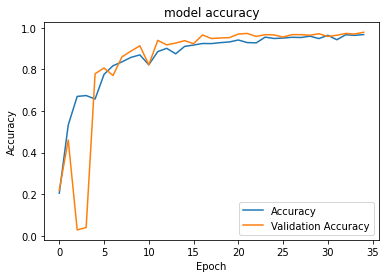

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

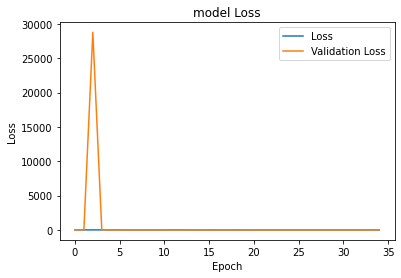

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
GreyTestData = TestGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Test/', target_size=(224,224), batch_size = 8, shuffle = False, color_mode='grayscale')

Found 750 images belonging to 60 classes.


In [ ]:
model.load_weights('/content/drive/My Drive/curetDataSet/Curnet_GreyScale_VGG16.h5')

In [ ]:
Grey_predict = model.predict(GreyTestData)

In [ ]:
Grey_predict_classes = np.argmax(Grey_predict, axis=1)

In [ ]:
Grey_predict_classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 15,
        5,  6,  6,  6,  6, 36,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9, 19, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 17, 17, 40, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 12, 18,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 54,
       20, 20, 20, 20, 20

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [ ]:
Grey_accuracy = accuracy_score(GreyTestData.classes, Grey_predict_classes)
print("Grey Accuracy: ", Grey_accuracy)

Grey Accuracy:  0.9693333333333334


In [ ]:
Grey_precision = precision_score(GreyTestData.classes, Grey_predict_classes,average="weighted")
print("Grey Precision: ", Grey_precision)

Grey Precision:  0.972913086913087


In [ ]:
Grey_recall = recall_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("Grey Recall:", Grey_recall)

Grey Recall: 0.9693333333333334


In [ ]:
Grey_f1_score = f1_score(GreyTestData.classes, Grey_predict_classes, average="weighted")
print("F1 score for Grey: ", Grey_f1_score)

F1 score for Grey:  0.9694708322365545


**Processinf for Colour Data.**

In [ ]:
Colour_TrainingData =  DataGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Train/', target_size=(224,224), batch_size=8)

Found 12733 images belonging to 60 classes.


In [ ]:
Colour_ValidData =  DataGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Valid/', target_size=(224,224), batch_size=8)

Found 693 images belonging to 60 classes.


In [ ]:
conv_base_colour = VGG16(weights = "imagenet", include_top = False)

In [ ]:
for layer in conv_base_colour.layers[:15]:
  layer.trainable = False
for layer in conv_base_colour.layers[15:]:
  layer.trainable = True

In [ ]:
from keras.layers import Input 

In [ ]:
input_tensor = Input(shape=(224,224,3))
x = conv_base_colour(input_tensor)
x = Flatten()(x)
x = Dense(2048, activation='relu', kernel_regularizer= regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
ouput = Dense(60, activation='softmax')(x)

In [ ]:
colour_model = Model(inputs = input_tensor, outputs = ouput )

In [ ]:
colour_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/My Drive/curetDataSet/Curnet_VGG16_Colour.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 40,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 40,
                              verbose = 1,
                              min_delta = 0.00001)

callBacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
hist = colour_model.fit_generator(steps_per_epoch=1592,generator= Colour_TrainingData, validation_data= Colour_ValidData, validation_steps=87,epochs=35,callbacks=callBacks)

Epoch 1/35
1592/1592 [==============================] - ETA: 0s - loss: 3.5415 - accuracy: 0.3377
Epoch 00001: val_loss improved from inf to 4.14365, saving model to /content/drive/My Drive/curetDataSet/Curnet_VGG16_Colour.h5
1592/1592 [==============================] - 278s 175ms/step - loss: 3.5415 - accuracy: 0.3377 - val_loss: 4.1437 - val_accuracy: 0.3276
Epoch 2/35
1592/1592 [==============================] - ETA: 0s - loss: 2.3281 - accuracy: 0.5586
Epoch 00002: val_loss did not improve from 4.14365
1592/1592 [==============================] - 289s 182ms/step - loss: 2.3281 - accuracy: 0.5586 - val_loss: 7.9050 - val_accuracy: 0.1905
Epoch 3/35
1592/1592 [==============================] - ETA: 0s - loss: 2.4401 - accuracy: 0.6171
Epoch 00003: val_loss did not improve from 4.14365
1592/1592 [==============================] - 262s 165ms/step - loss: 2.4401 - accuracy: 0.6171 - val_loss: 6.7608 - val_accuracy: 0.2367
Epoch 4/35
1592/1592 [==============================] - ETA: 0s -

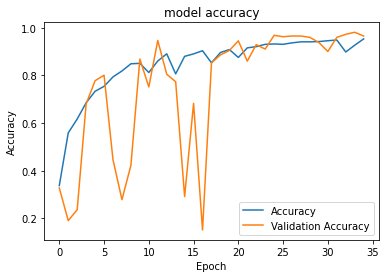

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

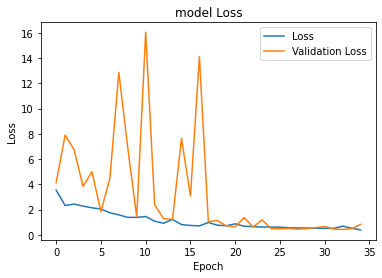

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
Colour_TestData = TestGenerator.flow_from_directory('/content/drive/My Drive/curetDataSet/Test/', target_size=(224,224), batch_size = 8, shuffle = False)

Found 750 images belonging to 60 classes.


In [ ]:
colour_model.load_weights('/content/drive/My Drive/curetDataSet/Curnet_VGG16_Colour.h5')

In [ ]:
Colour_predict = colour_model.predict(Colour_TestData)

In [ ]:
Colour_predict_classes = np.argmax(Colour_predict, axis=1)

In [ ]:
Colour_predict_classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  5,  3,  3,  3,  9,  3,  0,  4,  4, 42,  4,  4,  4,
        4,  4,  4,  4, 16,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
        7,  7, 24,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       20, 20, 20, 20, 20

In [ ]:
Colour_accuracy = accuracy_score(Colour_TestData.classes, Colour_predict_classes)
print("Colour Accuracy: ", Colour_accuracy)

Colour Accuracy:  0.968


In [ ]:
Colour_precision = precision_score(Colour_TestData.classes, Colour_predict_classes,average="weighted")
print("Colour Precision: ", Colour_precision)

Colour Precision:  0.971966332218506


In [ ]:
Colour_recall = recall_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("Colour Recall:", Colour_recall)

Colour Recall: 0.968


In [ ]:
Colour_f1_score = f1_score(Colour_TestData.classes, Colour_predict_classes, average="weighted")
print("F1 score for colour: ", Colour_f1_score)

F1 score for colour:  0.9681508457315724


In [ ]:
Final = 0.6* Colour_predict + 0.4* Grey_predict

In [ ]:
Final_Predict_classes = np.argmax(Final, axis=1)

In [ ]:
Final_accuracy = accuracy_score(Colour_TestData.classes, Final_Predict_classes)
print("Colour Accuracy: ", Final_accuracy)

Colour Accuracy:  0.9773333333333334


In [ ]:
Final_precision = precision_score(Colour_TestData.classes, Final_Predict_classes,average="weighted")
print("Colour Precision: ", Final_precision)

Colour Precision:  0.9795892870414609


In [ ]:
Final_recall = recall_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("Colour Recall:", Final_recall)

Colour Recall: 0.9773333333333334


In [ ]:
Final_f1_score = f1_score(Colour_TestData.classes, Final_Predict_classes, average="weighted")
print("F1 score for colour: ", Final_f1_score)

F1 score for colour:  0.9771563122433805


In [ ]:
Second_final = 0.5* Colour_predict + 0.5* Grey_predict

In [ ]:
Second_Final_Predict_classes = np.argmax(Second_final, axis=1)

In [ ]:
Mean_Final_accuracy = accuracy_score(Colour_TestData.classes, Second_Final_Predict_classes)
print("Colour Accuracy: ", Mean_Final_accuracy)

Colour Accuracy:  0.9826666666666667


In [ ]:
Mean_Precision = precision_score(Colour_TestData.classes, Second_Final_Predict_classes, average="weighted")
Mean_Precision

0.9845098235098235

In [ ]:
Mean_Recall = recall_score(Colour_TestData.classes, Second_Final_Predict_classes, average="weighted")
Mean_Recall

0.9826666666666667

In [ ]:
Mean_F1Score = f1_score(Colour_TestData.classes, Second_Final_Predict_classes, average="weighted")
Mean_F1Score

0.9827211619255872

In [ ]:
Final = 0.8 * Colour_predict + 0.2 * Grey_predict

In [ ]:
Final_Predict_classes = np.argmax(Final, axis=1)

In [ ]:
Final_accuracy = accuracy_score(Colour_TestData.classes, Final_Predict_classes)
print("Colour Accuracy: ", Final_accuracy)

Colour Accuracy:  0.968
